In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

colors = ["#008800", "#000088"]

In [2]:
data_path = "./data/"
data_files = {
  "Family":              "familyxx.csv",
  "Household":           "househld.csv",
  "Injury Episode":      "injpoiep.csv",
  "Person":              "personsx.csv",
  "Sample Child":        "samchild.csv",
  "Sample Adult":        "samadult.csv",
  "Sample Adult Cancer": "cancerxx.csv"
}

After reading through all of the potential variables provided by the [National Health Interview Survey](https://www.cdc.gov/nchs/nhis/nhis_2015_data_release.htm), I chose to look for a potential link between military status and financial status. More specifically, I wanted to compare whether someone served in the United States military with their current income bracket.

In [3]:
df = pd.read_csv(data_path + data_files["Person"])

The first step after loading in the data was to collect all of the indices that corresponded to anyone who served in the military and use them to filter the population into two groups. Roughly 1 in 15 people who responded to the were in the military at some point.

In [4]:
military_indices = (
    (df.ARMFTM1P == 1) | # US military 2001 - ????
    (df.ARMFTM2P == 1) | # US military 1990 - 2001
    (df.ARMFTM3P == 1) | # US military 1975 - 1990
    (df.ARMFTM4P == 1) | # US military 1964 - 1975
    (df.ARMFTM5P == 1) | # US military 1955 - 1964
    (df.ARMFTM6P == 1) | # US military 1950 - 1955
    (df.ARMFTM7P == 1)   # US military ???? - 1950
)
was_military = df[ military_indices]
not_military = df[~military_indices]
len(was_military), len(not_military)

(6863, 96926)

Next, I collected the income data for both groups, split into 11 different brackets:
* 01: \$1-\$4,999
* 02: \$5,000-\$9,999
* 03: \$10,000-\$14,999
* 04: \$15,000-\$19,999
* 05: \$20,000-\$24,999
* 06: \$25,000-\$34,999
* 07: \$35,000-\$44,999
* 08: \$45,000-\$54,999
* 09: \$55,000-\$64,999
* 10: \$65,000-\$74,999
* 11: \$75,000-$\infty$

In [5]:
def get_incomes(df):
    return df[              # people who
        (df.WRKLYR1 == 1) & # worked last year
        (df.ERNYR_P < 12)   # and reported their earnings
    ].ERNYR_P               # were in these income brackets

In [6]:
y_incomes = get_incomes(was_military)
n_incomes = get_incomes(not_military)

To get a good idea of what trends may exist in the data, I normalized the values and plotted them, both as a histogram of the actual data and as an estimation of the PDF via KDE.

In [7]:
y_i, y_v = y_incomes.value_counts().index, y_incomes.value_counts().values
n_i, n_v = n_incomes.value_counts().index, n_incomes.value_counts().values
# y_v = y_v / y_v.max().astype(float)
# n_v = n_v / n_v.max().astype(float)
y_v = y_v / y_v.sum().astype(float)
n_v = n_v / n_v.sum().astype(float)

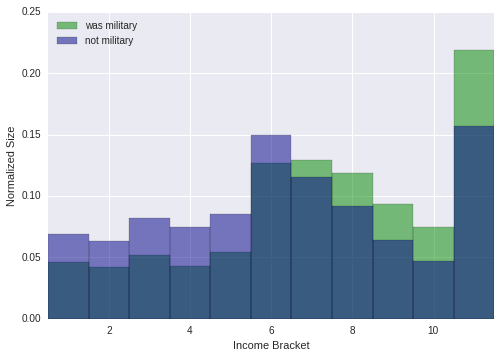

In [8]:
plt.bar(y_i - 0.5, y_v, label = "was military", width = 1, color = colors[0], alpha = 0.5)
plt.bar(n_i - 0.5, n_v, label = "not military", width = 1, color = colors[1], alpha = 0.5)
plt.xlim(0.5, 11.5)
plt.xlabel("Income Bracket")
plt.ylabel("Normalized Size")
plt.legend(loc = "best")

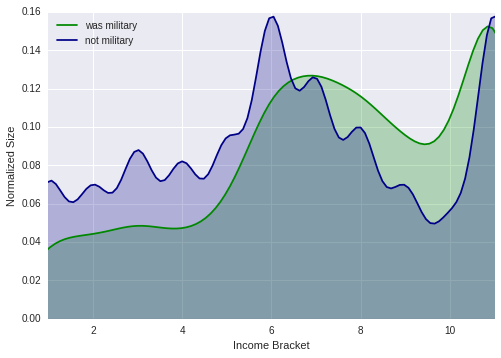

In [9]:
sns.distplot(y_incomes, label = "was military", color = colors[0],
             hist = False, kde_kws = {"shade": True}, norm_hist = True)
sns.distplot(n_incomes, label = "not military", color = colors[1],
             hist = False, kde_kws = {"shade": True}, norm_hist = True)
plt.xlim(1, 11)
plt.xlabel("Income Bracket")
plt.ylabel("Normalized Size")
plt.legend(loc = "best")

From our visualizations, we can see that it seems like people who served in the military were underrepresented in low income brackets and overrepresented in high income brackets compared to the rest of the population.

In [10]:
# split income brackets into low and high, compare stuff